# Market segmentation example

#### Problem: 

We've got data from a retail shop. 
There are 30 observations. Each observation is a client and we have a score for their customer satisfaction and brand loyalty.

We want to cluster the data properly so that we can check how the data is gathered and make predictions accordingly.

## Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# Importing the KMeans module so I can perform k-means clustering with sklearn
from sklearn.cluster import KMeans

## Load the data

In [2]:
# Loading the data
data = pd.read_csv ('3.12. Example.csv')

In [3]:
# Checking what's inside
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


## Plot the data

Create a preliminary plot to see if you can spot something

Text(0, 0.5, 'Loyalty')

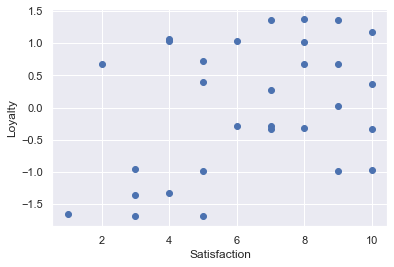

In [4]:
# I am creating a scatter plot of the two variables
plt.scatter(data['Satisfaction'],data['Loyalty'])
# Naming axes 
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

## Select the features

In [5]:
# SelectING both features by creating a copy of the data variable
x = data.copy()

## Clustering

In [6]:
# Creating an object (which I would call kmeans)
kmeans = KMeans(2)
# FitTING the data
kmeans.fit(x)

KMeans(n_clusters=2)

## Clustering results

In [7]:
# Creating a copy of the input data
clusters = x.copy()
# Taking note of the predicted clusters 
clusters['cluster_pred']=kmeans.fit_predict(x)

Text(0, 0.5, 'Loyalty')

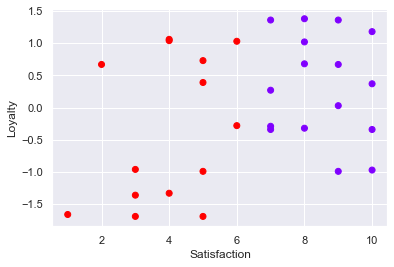

In [8]:
# Plotting the data using the longitude and the latitude
plt.scatter(clusters['Satisfaction'],clusters['Loyalty'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

## Standardize the variables

In [9]:
# Importing sklearn preprocessing
from sklearn import preprocessing
# Scaling the inputs
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

## Take advantage of the Elbow method

In [10]:
# Creating an empty list
wcss =[]

# Creating all possible cluster solutions with a loop
# I have chosen to get solutions from 1 to 9 clusters;
for i in range(1,10):
    # Clsuter solution with i clusters
    kmeans = KMeans(i)
    # Fitting the STANDARDIZED data
    kmeans.fit(x_scaled)
    # Appending the WCSS for the iteration
    wcss.append(kmeans.inertia_)
    
# Checking the result
wcss

[59.999999999999986,
 29.818973034723143,
 17.913349527387968,
 10.247181805928422,
 7.792695153937187,
 6.54983679159933,
 5.460205311645821,
 4.315662464700004,
 3.906995818843149]

Text(0, 0.5, 'WCSS')

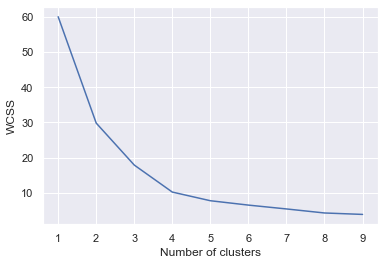

In [11]:
# Plotting the number of clusters vs WCSS
plt.plot(range(1,10),wcss)
# Naming the axes
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')